In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('GDP.csv')

In [11]:
#Drop countries which has NaN
df_drop=df.dropna(axis=0)

In [12]:
print(df_drop)

                            country   1960   1961   1962   1963   1964   1965  \
6                         Argentina   7410   7690   7500   6990   7570   8240   
10                        Australia  19.9k    20k  19.8k  20.6k  21.7k  22.5k   
11                          Austria  12.1k  12.6k  12.9k  13.4k  14.1k  14.5k   
13                          Burundi    291    245    260    265    274    277   
14                          Belgium  11.7k  12.3k  12.9k  13.3k  14.1k  14.5k   
..                              ...    ...    ...    ...    ...    ...    ...   
200                   United States  19.1k  19.3k  20.1k  20.7k  21.6k  22.7k   
202  St. Vincent and the Grenadines   1890   1940   1980   1830   1860   1850   
208                    South Africa   3970   4010   4140   4310   4510   4640   
209                          Zambia   1200   1180   1110   1110   1210   1370   
210                        Zimbabwe   1140   1170   1150   1190   1140   1160   

      1966   1967   1968  .

In [13]:
#Convert k to thousand
for i in range(1960, 2022):
  contains_k=df_drop[str(i)].str.contains('k')
  df_drop.loc[contains_k, str(i)]=df_drop.loc[contains_k, str(i)].replace({"k": ""}, regex=True).astype('float')*1000

<ipython-input-13-fbe08c2d0e53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop.loc[contains_k, str(i)]=df_drop.loc[contains_k, str(i)].replace({"k": ""}, regex=True).astype('float')*1000


In [15]:
#taken from https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region
region=pd.read_csv('continents.csv')
index=pd.Index(['name', 'region'])
region=region[index]
region.rename(columns = {'name':'country'}, inplace = True)
df_drop=pd.merge(df_drop,region)
print(df_drop)

          country     1960     1961     1962     1963     1964     1965  \
0       Argentina     7410     7690     7500     6990     7570     8240   
1       Australia  19900.0  20000.0  19800.0  20600.0  21700.0  22500.0   
2         Austria  12100.0  12600.0  12900.0  13400.0  14100.0  14500.0   
3         Burundi      291      245      260      265      274      277   
4         Belgium  11700.0  12300.0  12900.0  13300.0  14100.0  14500.0   
..            ...      ...      ...      ...      ...      ...      ...   
77        Uruguay     6160     6230     6060     6000     6080     6080   
78  United States  19100.0  19300.0  20100.0  20700.0  21600.0  22700.0   
79   South Africa     3970     4010     4140     4310     4510     4640   
80         Zambia     1200     1180     1110     1110     1210     1370   
81       Zimbabwe     1140     1170     1150     1190     1140     1160   

       1966     1967     1968  ...     2013     2014     2015     2016  \
0      8060     8190     

In [17]:
#Transpose
df_transpose=df_drop.T
print(df_transpose)

                0          1        2        3        4       5   \
country  Argentina  Australia  Austria  Burundi  Belgium   Benin   
1960          7410    19900.0  12100.0      291  11700.0     657   
1961          7690    20000.0  12600.0      245  12300.0     668   
1962          7500    19800.0  12900.0      260  12900.0     634   
1963          6990    20600.0  13400.0      265  13300.0     653   
...            ...        ...      ...      ...      ...     ...   
2018       13100.0    58500.0  46200.0      274  42400.0    1110   
2019       12700.0    58900.0  46600.0      270  43100.0    1150   
2020       11300.0    58100.0  43500.0      263  40600.0    1160   
2021       12400.0    59300.0  45200.0      261  42900.0    1210   
region    Americas    Oceania   Europe   Africa   Europe  Africa   

                   6           7         8         9   ...      72      73  \
country  Burkina Faso  Bangladesh   Bahamas    Belize  ...    Chad    Togo   
1960              244      

In [18]:
#Replace old columns with the name of the countries
df_transpose.columns=df_transpose.iloc[0]
df_transpose=df_transpose.drop(index='country')
print(df_transpose)

country Argentina Australia  Austria Burundi  Belgium   Benin Burkina Faso  \
1960         7410   19900.0  12100.0     291  11700.0     657          244   
1961         7690   20000.0  12600.0     245  12300.0     668          250   
1962         7500   19800.0  12900.0     260  12900.0     634          262   
1963         6990   20600.0  13400.0     265  13300.0     653          254   
1964         7570   21700.0  14100.0     274  14100.0     684          256   
...           ...       ...      ...     ...      ...     ...          ...   
2018      13100.0   58500.0  46200.0     274  42400.0    1110          696   
2019      12700.0   58900.0  46600.0     270  43100.0    1150          716   
2020      11300.0   58100.0  43500.0     263  40600.0    1160          710   
2021      12400.0   59300.0  45200.0     261  42900.0    1210          740   
region   Americas   Oceania   Europe  Africa   Europe  Africa       Africa   

country Bangladesh   Bahamas    Belize  ...    Chad    Togo Tha

In [24]:
df_transpose.iloc[:-2].astype('float').corr()

country,Argentina,Australia,Austria,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bahamas,Belize,...,Chad,Togo,Thailand,Trinidad and Tobago,Turkey,Uruguay,United States,South Africa,Zambia,Zimbabwe
country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.874119,0.846226,-0.279679,0.844175,0.840532,0.875393,0.794451,0.438429,0.768006,...,0.640477,0.312930,0.859968,0.910516,0.877527,0.904077,0.841464,0.834461,0.207275,-0.113739
Australia,0.874119,1.000000,0.985590,-0.253314,0.986162,0.959940,0.962068,0.863699,0.646866,0.946151,...,0.585340,0.228987,0.984980,0.922189,0.960995,0.931765,0.994065,0.701592,-0.059923,-0.132136
Austria,0.846226,0.985590,1.000000,-0.126698,0.999343,0.914853,0.912427,0.782394,0.689121,0.971207,...,0.474456,0.220530,0.963380,0.875322,0.919967,0.883406,0.992618,0.636737,-0.199514,-0.047471
Burundi,-0.279679,-0.253314,-0.126698,1.000000,-0.124281,-0.370644,-0.393253,-0.498523,0.077919,-0.134062,...,-0.599180,0.186101,-0.292443,-0.425252,-0.317626,-0.378286,-0.199345,-0.302007,-0.488316,0.557149
Belgium,0.844175,0.986162,0.999343,-0.124281,1.000000,0.917759,0.913770,0.785559,0.686449,0.969531,...,0.472693,0.239064,0.963371,0.873448,0.922573,0.883143,0.993298,0.642537,-0.193001,-0.041089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.904077,0.931765,0.883406,-0.378286,0.883143,0.940679,0.974963,0.950108,0.449279,0.815790,...,0.686986,0.257311,0.955962,0.909421,0.976407,1.000000,0.907649,0.736730,0.183343,-0.159277
United States,0.841464,0.994065,0.992618,-0.199345,0.993298,0.943791,0.940659,0.833105,0.688042,0.961250,...,0.525013,0.219687,0.979729,0.885853,0.946456,0.907649,1.000000,0.643749,-0.146278,-0.096644
South Africa,0.834461,0.701592,0.636737,-0.302007,0.642537,0.748336,0.766995,0.730783,0.304710,0.506612,...,0.659667,0.514719,0.658745,0.848485,0.741885,0.736730,0.643749,1.000000,0.513730,-0.245968


<ipython-input-46-daeb1f1ff902>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,8,count)


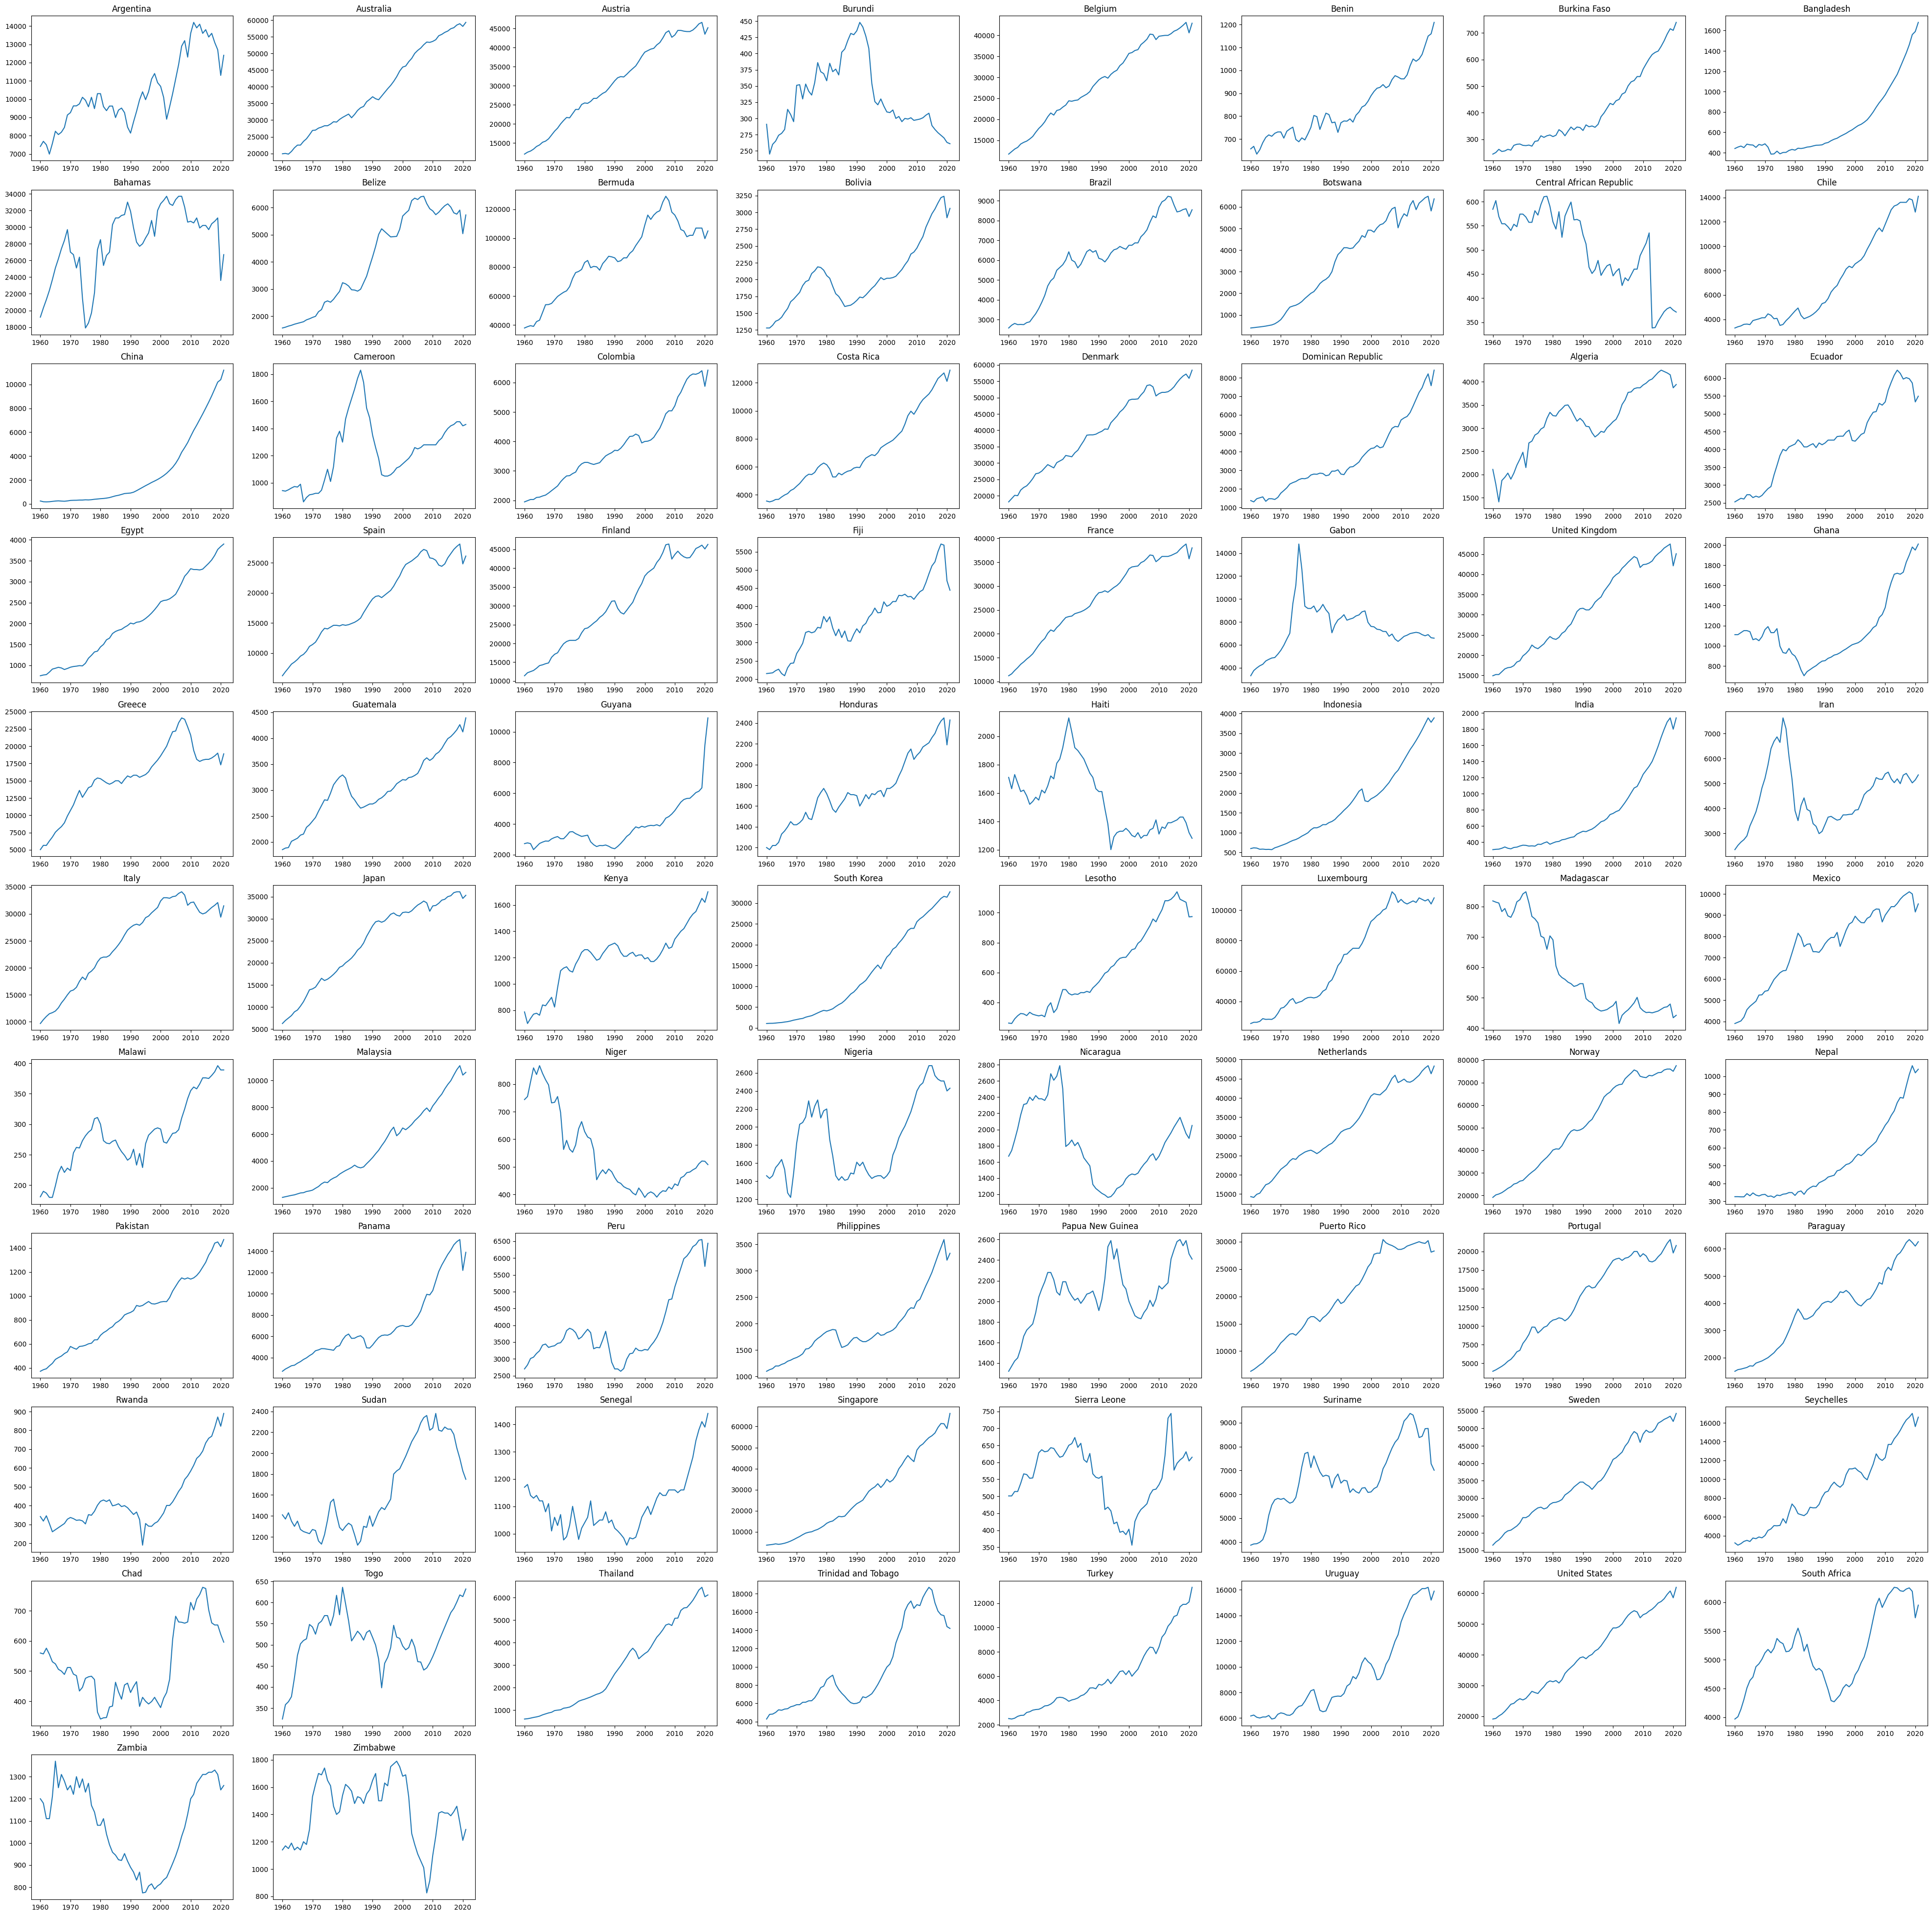

In [46]:
#Visualize GDPs
#Each plot has different scaling
count=1
plt.subplots(figsize=(50,50))
for i in df_transpose.columns:
  plt.subplot(11,8,count)
  df_transpose[i].iloc[:-1].astype('float').plot()
  count+=1
  plt.title(i)
plt.show()

<ipython-input-100-31169de1092d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,count)


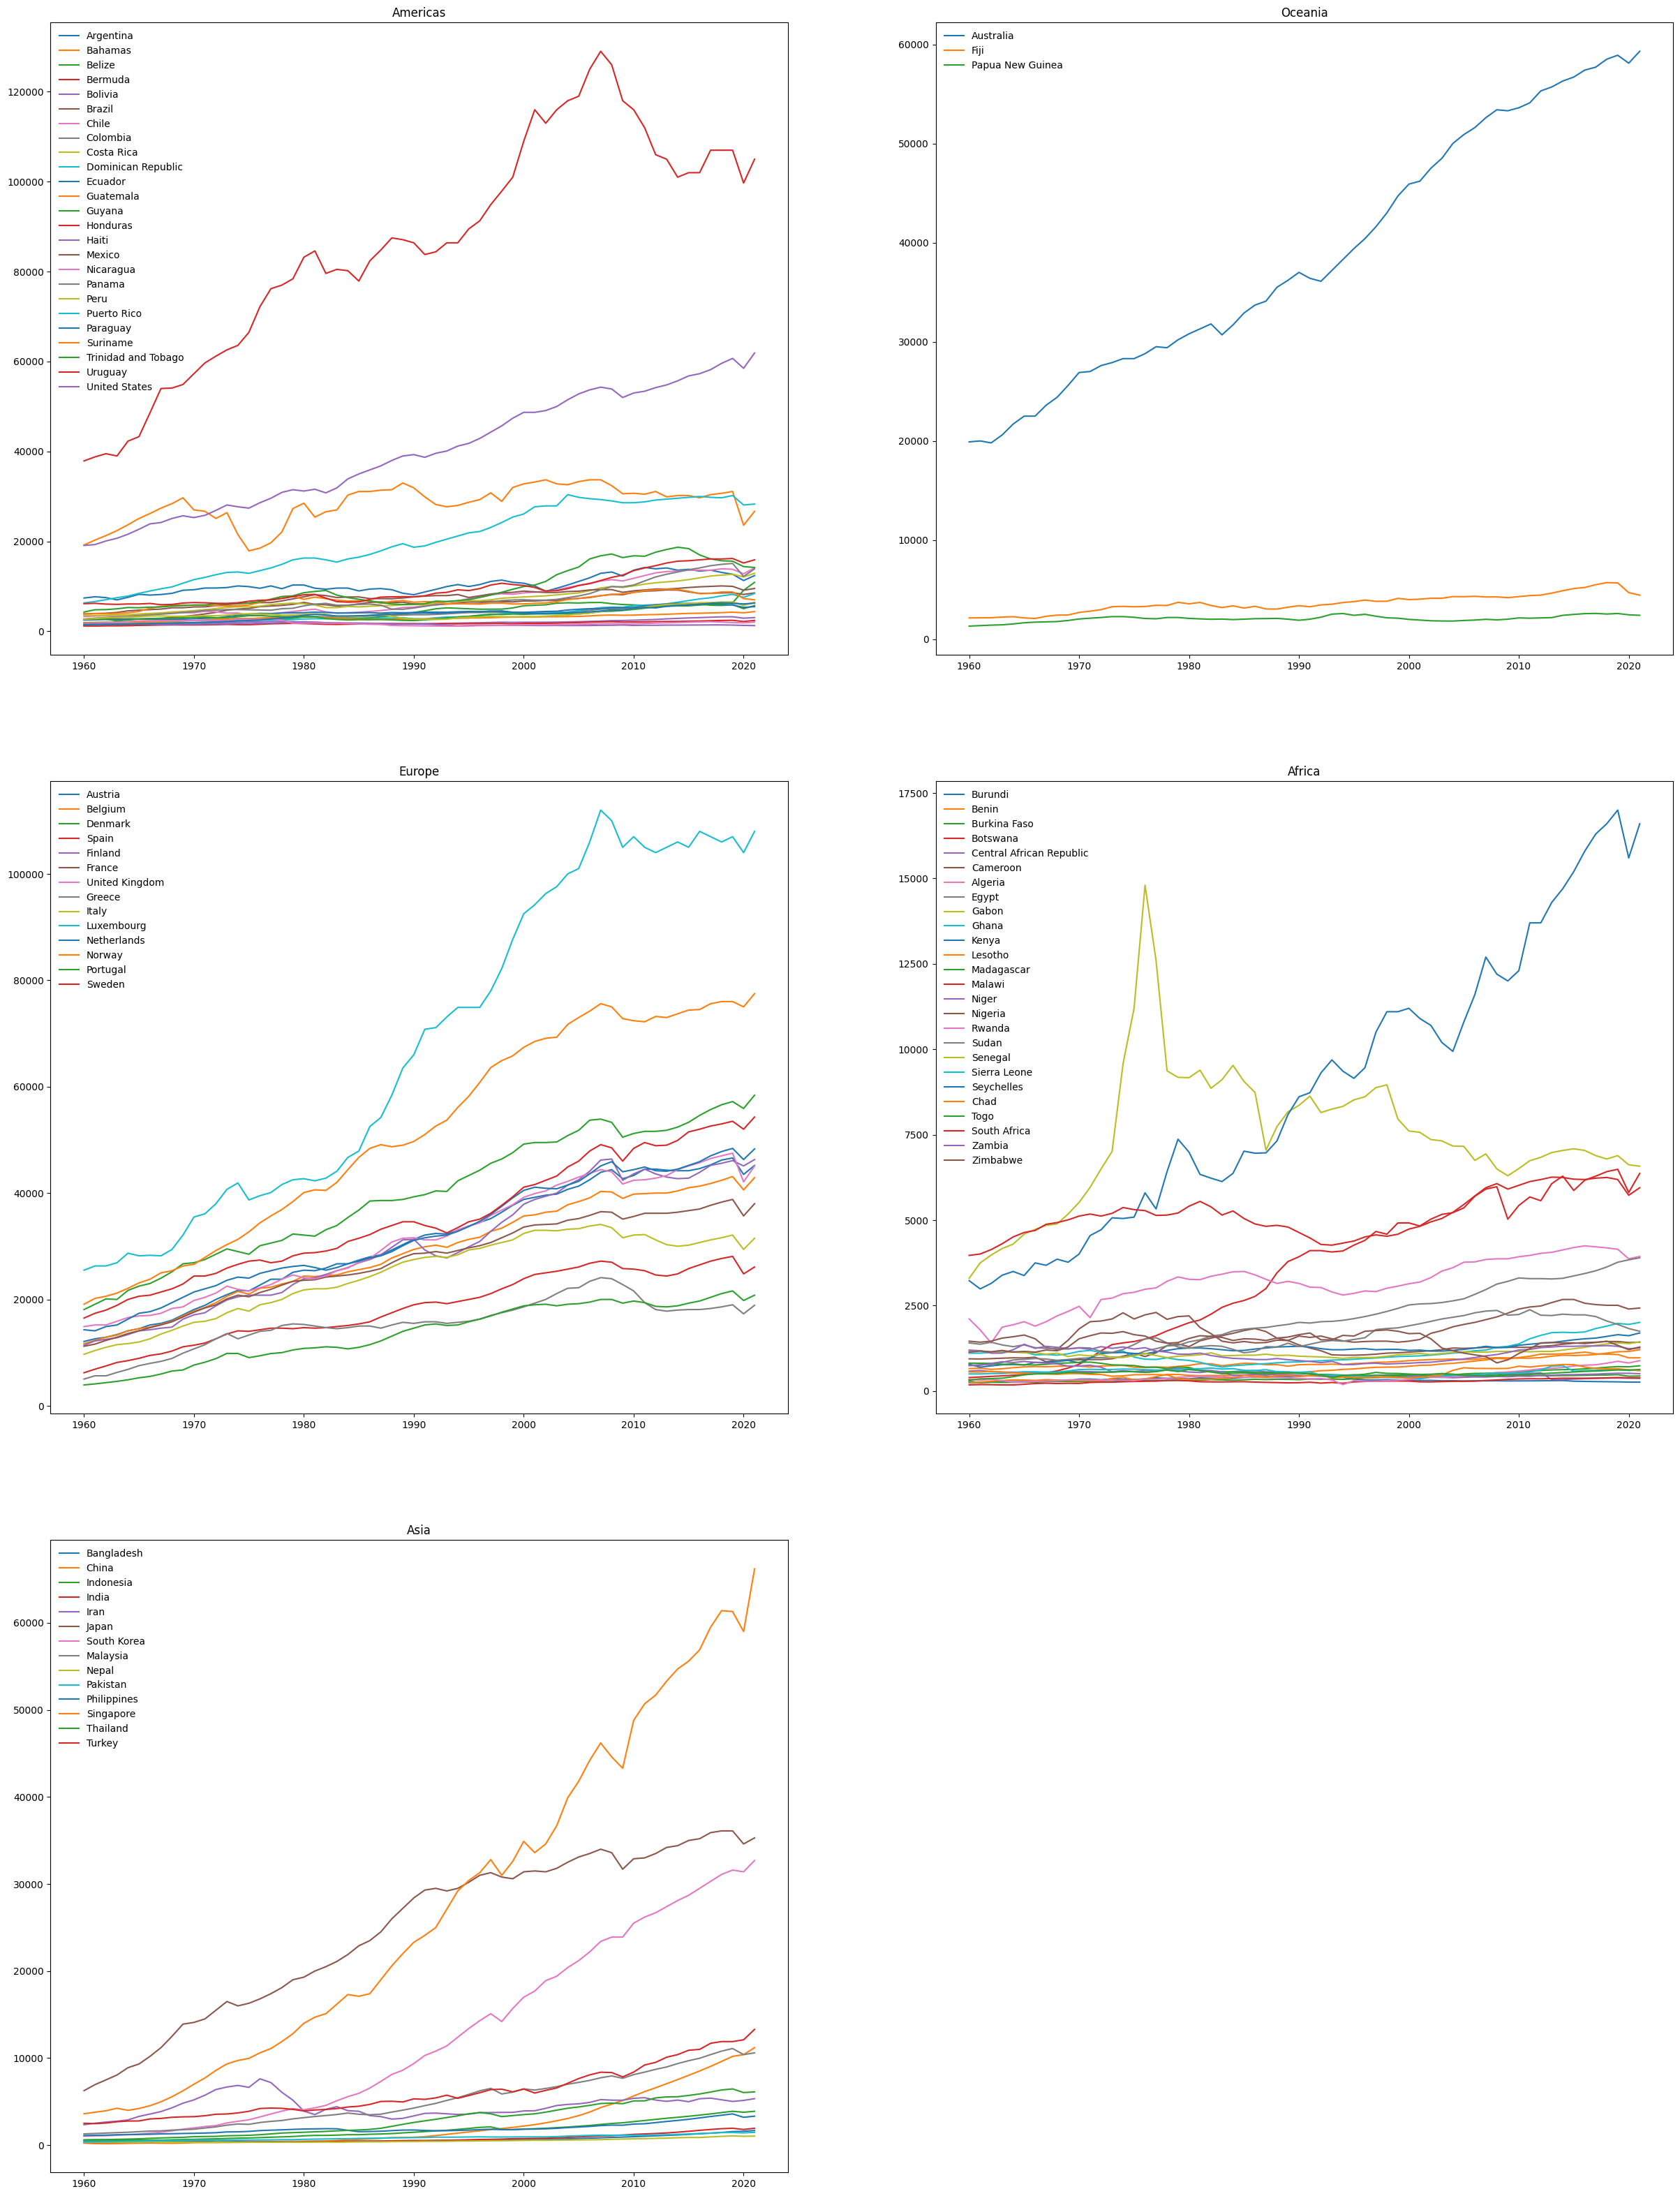

In [100]:
#plot by region
list_region=df_transpose.iloc[-1].unique()
plt.subplots(figsize=(30,40))
count=1
for i in list_region:
  df_region=df_drop.where(df_drop['region']==i).dropna().T
  plt.subplot(3,2,count)

  df_region.columns=df_region.iloc[0]
  df_region=df_region.drop(index='country')

  for j in df_region.columns:
    df_region[j].iloc[:-1].astype('float').plot()
  plt.title(i)
  plt.legend(frameon=False)
  count+=1

Index(['Argentina', 'Australia', 'Austria', 'Burundi', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bahamas', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Botswana', 'Central African Republic', 'Chile', 'China',
       'Cote d'Ivoire', 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Honduras',
       'Haiti', 'Indonesia', 'India', 'Iran', 'Italy', 'Japan', 'Kenya',
       'South Korea', 'Lesotho', 'Luxembourg', 'Madagascar', 'Mexico',
       'Malawi', 'Malaysia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands',
       'Norway', 'Nepal', 'Pakistan', 'Panama', 'Peru', 'Philippines',
       'Papua New Guinea', 'Puerto Rico', 'Portugal', 'Paraguay', 'Rwanda',
       'Sudan', 'Senegal', 'Singapore', 'Sierra Leone', 'Suriname', 'Sweden',
       'Seychelles', 'C

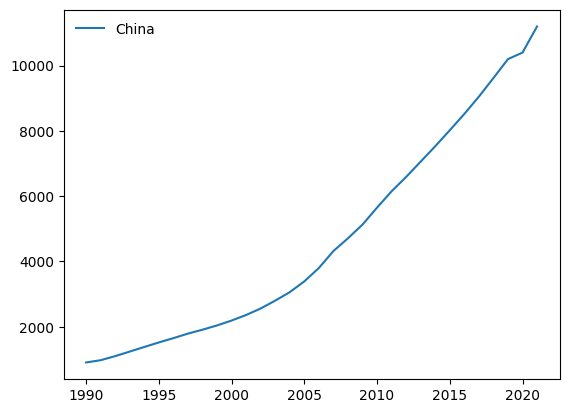

In [ ]:
#compare some countries
print(df_transpose.columns)
countries=input("Countries to compare (seperate with comma): ")
years=input("Year (e.g. '1997-2000', 'all'): ")
list_country=countries.split(',')
if years!="all":
  xlim, xmax=years.split('-')
else:
  xmin='1960'
  xmax='2021'
for i in list_country:
  df_transpose[i][xlim:xmax].astype('float').plot()
plt.legend(frameon=False)
plt.show()